In [1]:
! code .

## 1コンポーネント


基本

In [ ]:
import heatrapy as ht
import pandas as pd
import os

if os.path.exists("heat_transfer.txt"):
    os.remove("heat_transfer.txt")
    
example = ht.single_object(amb_temperature=293, materials=('water',), borders=(1,21),materials_order=(0,),
                            dx=0.001, dt=0.001, file_name='heat_transfer.txt',boundaries=(0,0), Q=[], Q0=[],initial_state=False)

example.Cp[1],example.k[1],example.rho[1]

example.set_input_heat_transfer(1,700,1500)

example.set_radiation(1,0.9,293.15)

example.compute(timeInterval=30, write_interval=10, solver='implicit_k(x)')

df = pd.read_csv("heat_transfer.txt")
df=df.drop("heat[1](W)", axis=1)
df=df.drop("heat[-2](J)", axis=1)
df = df.set_index("time(s)")
df.plot(figsize=(15,8))

２物質の固着

In [1]:
import heatrapy as ht
import pandas as pd
import utility
import os

if os.path.exists("example.txt"):
    os.remove("example.txt")
    
example = ht.single_object(amb_temperature=293, materials=('Gd','Cu'), borders=(1,11,21),materials_order=(0,1),
                            dx=0.05, dt=0.1, file_name='example.txt',boundaries=(300,0), Q=[], Q0=[],initial_state=False)
example.compute(timeInterval=100000, write_interval=1000, solver='implicit_k(x)')

In [ ]:
df = pd.DataFrame({"time(s)":[0,100,200,300,1000],
                   "Heat_transfer_coefficient":[30,90,45,50,20],
                   "temparature":[500,600,650,450,300]
                  })

f_Heat_transfer_coefficient = utility.create_function(df["time(s)"], df["Heat_transfer_coefficient"])
f_temparature = utility.create_function(df["time(s)"], df["temparature"])

example.set_input_heat_transfer_function(1,f_Heat_transfer_coefficient,f_temparature)

In [ ]:
example.compute(timeInterval=100000, write_interval=1000, solver='implicit_k(x)')

In [44]:
df = pd.read_csv("example.txt")
df=df.drop("heat[1](W)", axis=1)
df=df.drop("heat[-2](J)", axis=1)
df = df.set_index("time(s)")
# df.plot(figsize=(15,8))

In [45]:
df_taisho = df.T

In [46]:
import numpy as np
df_taisho = df_taisho.set_index(pd.Series(np.arange(0,11,0.5)))
df_taisho = df_taisho[100000.000001]
df_taisho = df_taisho[0:10]

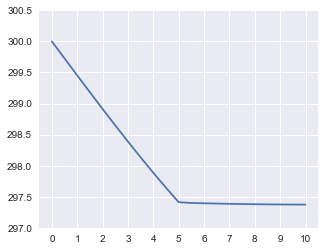

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()# SeabornのデフォルトStyleを使用
fig = plt.figure(figsize=(5,4))# グラフのサイズを設定(横×縦)
ax = fig.add_subplot(111)
df_taisho.plot()
ax.set_xticks(np.arange(0,11,1))# X軸のTick（目盛）の位置を設定
ax.set_yticks(np.arange(297, 301., 0.5))# X軸のTick（目盛）の表記を設定

## 2コンポーネント

## 2コンポーネント

In [1]:
import heatrapy as ht
import pandas as pd
import utility
import os

コンポーネント1の特性

In [2]:
material_1 = "water"
length_1 = 50

コンポーネント2の特性

In [3]:
material_2 = "Gd"
length_2 = 50

共通事項

In [4]:
init_temperature = 293 #初期温度
output_file_name_header = "2comp_test"

analysis_time = 1000
dt = 0.1

解析モデルの作成

In [5]:
if os.path.exists(output_file_name_header+"_0.txt"):
    os.remove(output_file_name_header+"_0.txt")
if os.path.exists(output_file_name_header+"_1.txt"):
    os.remove(output_file_name_header+"_1.txt")

two_comp = ht.system_objects(number_objects=2, materials=(material_1, material_2),
                 objects_length=(length_1, length_2), amb_temperature=init_temperature, dx=0.01, dt=dt,
                 file_name=output_file_name_header,boundaries=((0,0), (1, 0)), initial_state=False, materials_path=False)

境界条件の設定（断熱以外のオブジェクトを設定する）

In [6]:
two_comp.objects[0].boundaries=(300,0)

In [7]:
for i in range(len(two_comp.objects)):
    print("コンポーネント" + str(i) + " （前端温度、後端温度)=" + str(two_comp.objects[i].boundaries) + "  ※0は断熱条件")

コンポーネント0 （前端温度、後端温度)=(300, 0)  ※0は断熱条件
コンポーネント1 （前端温度、後端温度)=(0, 0)  ※0は断熱条件


熱伝達で入熱

In [8]:
# two_comp.set_input_heat_transfer((0,1),700,900)

熱伝達で入熱 関数

In [9]:
df = pd.DataFrame({"time(s)":[0,100,200,300,1000],
                   "Heat_transfer_coefficient":[300,500,600,900,1200],
                   "temparature":[1000,1200,1500,1700,1800]
                  })
f_Heat_transfer_coefficient = utility.create_function(df["time(s)"], df["Heat_transfer_coefficient"])
f_temparature = utility.create_function(df["time(s)"], df["temparature"])
two_comp.set_input_heat_transfer_function((0,1),f_Heat_transfer_coefficient,f_temparature)

In [10]:
df.plot(x="time(s)")

輻射を追加 

In [12]:
two_comp.set_radiation((0,1),0.9,293.15)

接触の定義

In [11]:
two_comp.contactAdd(((0,11),(1,1),30000))
two_comp.contacts

{((0, 11), (1, 1), 30000)}

問題を解く

In [12]:
two_comp.compute(timeInterval=analysis_time, write_interval=100, solver='implicit_k(x)')

ポスト処理

In [13]:
df_1 = pd.read_csv(output_file_name_header+"_0.txt",dtype=float).drop(["T[0] (K)"],axis=1)
df_2 = pd.read_csv(output_file_name_header+"_1.txt",dtype=float).drop(["T[0] (K)"],axis=1)

In [14]:
1493.298796

1493.298796

In [17]:
df_1

,time(s),T[1] (K),T[2] (K),T[3] (K),T[4] (K),T[5] (K),T[6] (K),T[7] (K),T[8] (K),T[9] (K),...,T[42] (K),T[43] (K),T[44] (K),T[45] (K),T[46] (K),T[47] (K),T[48] (K),T[49] (K),T[50] (K),T[51] (K)
0,0.1,293.505428,293.000036,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
1,10.0,343.420974,293.357200,293.001694,293.000006,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
2,20.1,393.837965,294.425225,293.013532,293.000097,293.000001,293.000000,293.000000,293.000000,293.000000,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
3,30.2,443.528536,296.175265,293.045135,293.000483,293.000004,293.000000,293.000000,293.000000,293.000000,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
4,40.3,492.308891,298.576582,293.105430,293.001503,293.000017,293.000000,293.000000,293.000000,293.000000,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,969.5,1682.932272,967.696851,548.654434,370.788698,312.604181,297.201866,293.782399,293.128719,293.018963,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
97,979.6,1684.826820,971.947794,552.127329,372.520114,313.226252,297.377012,293.823039,293.136753,293.020348,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
98,989.7,1686.716010,976.154021,555.586264,374.260490,313.857842,297.556681,293.865162,293.145168,293.021815,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
99,999.8,1688.599951,980.316527,559.031135,376.009505,314.498868,297.740900,293.908798,293.153974,293.023365,...,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0


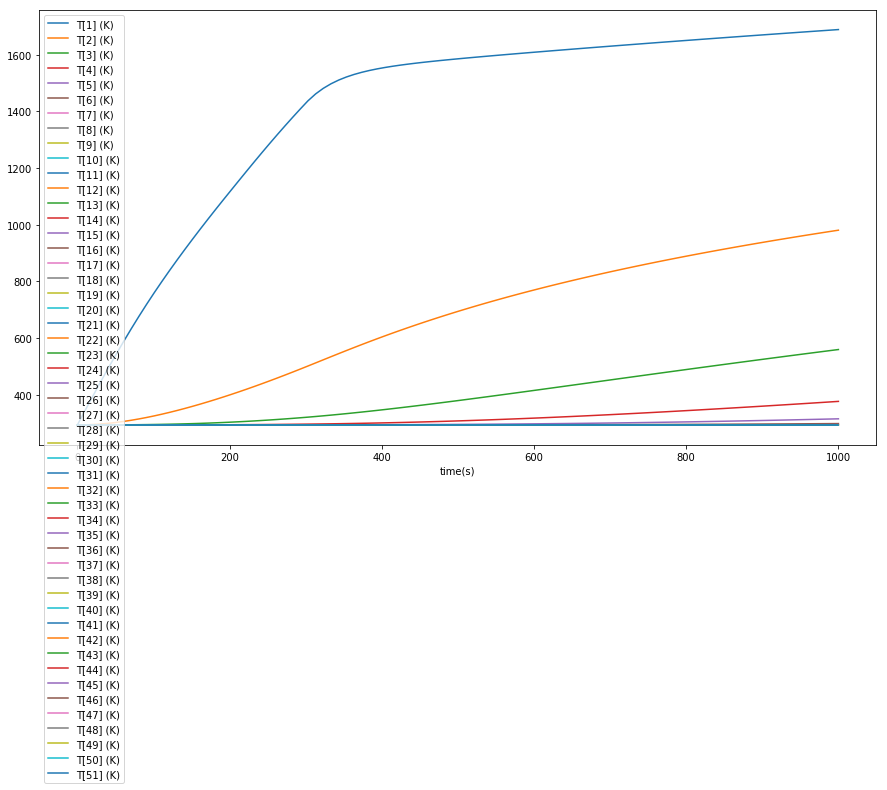

In [15]:
df_1.plot(x="time(s)",figsize=(15,8))

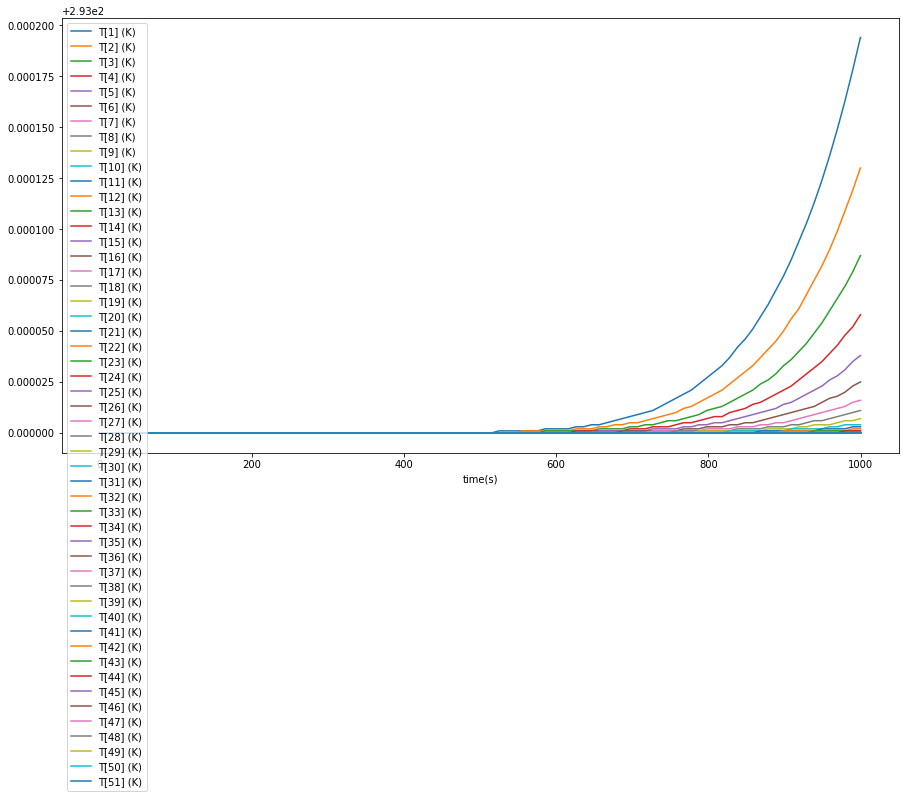

In [16]:
df_2.plot(x="time(s)",figsize=(15,8))

## 3コンポーネント

In [1]:
import heatrapy as ht
import pandas as pd
import os

In [2]:
output_file_name_header = "test_1"

In [3]:
three_comp = ht.system_objects(number_objects=3, materials=('Cu', 'AL','Cu'),
                 objects_length=(10, 10,20), amb_temperature=293, dx=0.001, dt=0.01,
                 file_name=output_file_name_header, initial_state=False,
                 boundaries=((2, 0), (3, 0),(0,0)), materials_path=False)

In [4]:
three_comp.objects[0].boundaries=(500,0)
for i in range(len(three_comp.objects)):
    print("コンポーネント" + str(i) + " （前端温度、後端温度)=" + str(three_comp.objects[i].boundaries) + "  ※0は断熱条件")

コンポーネント0 （前端温度、後端温度)=(500, 0)  ※0は断熱条件
コンポーネント1 （前端温度、後端温度)=(0, 0)  ※0は断熱条件
コンポーネント2 （前端温度、後端温度)=(0, 0)  ※0は断熱条件


In [5]:
three_comp.contacts.add(((0,10),(1,1),3000))

In [6]:
three_comp.contacts.add(((1,10),(2,1),5000))

In [7]:
three_comp.compute(timeInterval=60, write_interval=100, solver='implicit_k(x)')

In [8]:
df_1 = pd.read_csv(output_file_name_header+"_0.txt",dtype=float).drop(["T[0] (K)"],axis=1)
df_2 = pd.read_csv(output_file_name_header+"_1.txt",dtype=float).drop(["T[0] (K)"],axis=1)
df_3 = pd.read_csv(output_file_name_header+"_2.txt",dtype=float).drop(["T[0] (K)"],axis=1)

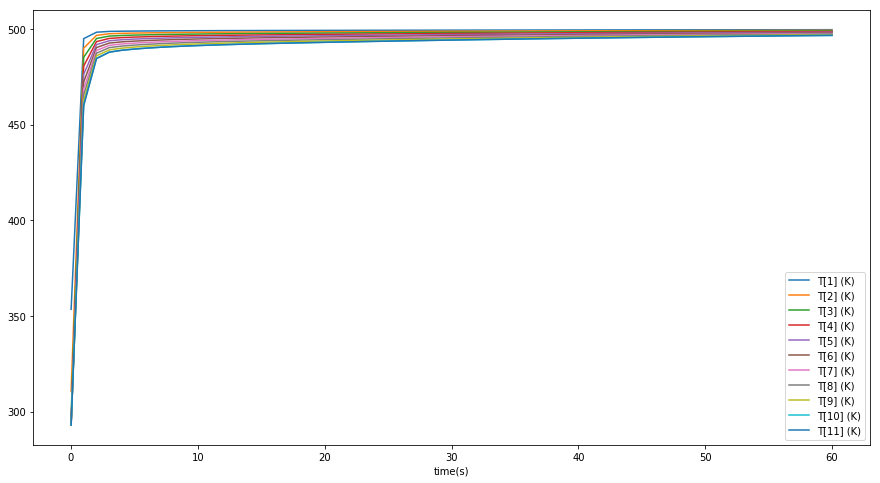

In [10]:
df_1.plot(x="time(s)",figsize=(15,8))

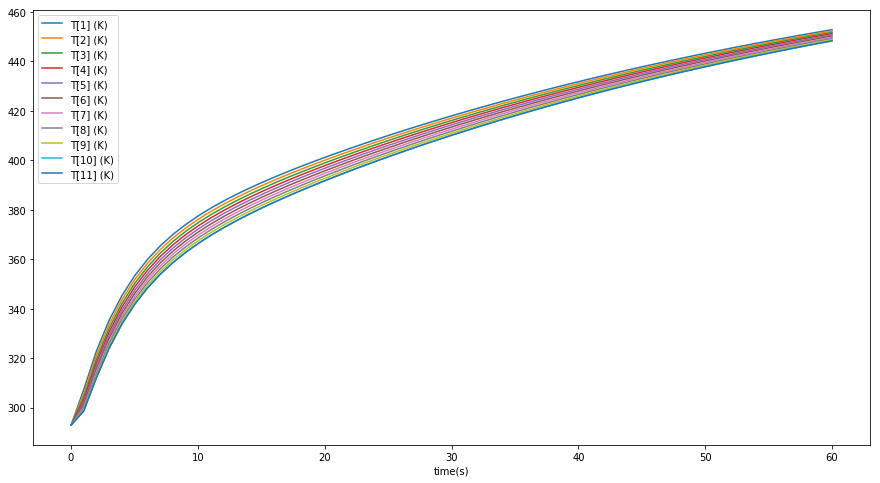

In [11]:
df_2.plot(x="time(s)",figsize=(15,8))

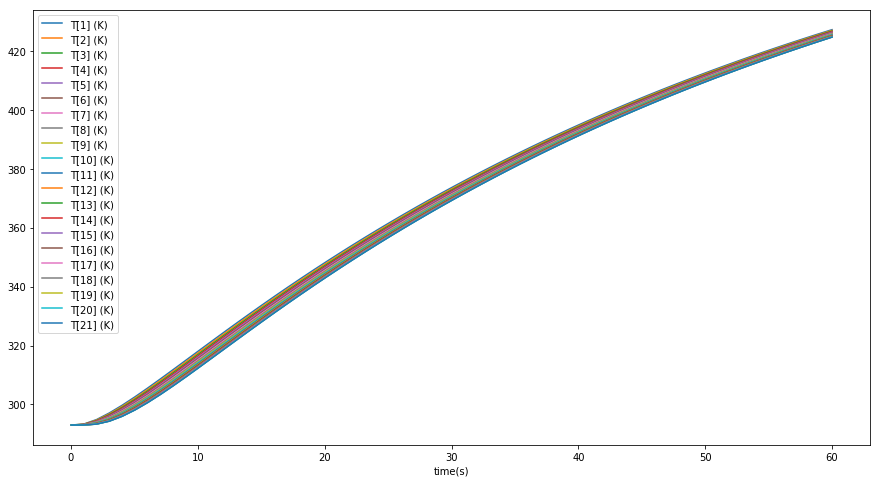

In [12]:
df_3.plot(x="time(s)",figsize=(15,8))